<h1 style="text-align: center; color: purple;">Mobile Phone Price Prediction</h1>

This project aims to create a model to predict the price of mobile phones based on selected features.

The dataset is obtained form kaggle (https://www.kaggle.com/datasets/ganjerlawrence/mobile-phone-price-predictioncleaned-dataset), and is pre-cleaned.

In [1]:
#Import relevant modules
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load csv file into df
df = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv')
df.sample(3)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
652,3.4,6.0,64.0,4.50,48,8.0,3000,599
684,3.9,8.0,8.0,4.58,48,8.0,1900,1680
594,3.7,6.0,32.0,4.50,48,8.0,3000,649


In [3]:
# Understanding the data, checking for Null values
display(df.describe())
print(df.shape)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


(807, 8)


In [4]:
# Creating dataframe of features, x
x = df.drop(['Price'], axis=1)

# Creating dataframe of target, y
y = df[['Price']]

In [5]:
# Splitting features and target data for training and testing. Test size 20% of data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# Checking the shape of the train and test dataframe
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(645, 7)
(645, 1)
(162, 7)
(162, 1)


In [6]:
display(x_train.head(3))
display(y_train.head(3))

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
489,4.5,6.0,32.0,4.54,48,13.0,1900
196,3.3,6.0,25.0,4.54,64,8.0,3000
95,4.3,3.0,32.0,6.20,38,2.0,4230


,Price
489,1570
196,715
95,9490


In [7]:
# Creating new dataframe x_y to include target variable, for correaltion matrix
x_y = x_train.copy()
x_y['Y'] = y_train
display(x_y.sample(3))

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Y
170,4.1,4.0,3.0,4.50,48,12.0,3000,949
598,4.4,8.0,256.0,6.44,48,8.0,4700,31990
96,4.3,3.0,32.0,5.50,38,1.0,3000,14990


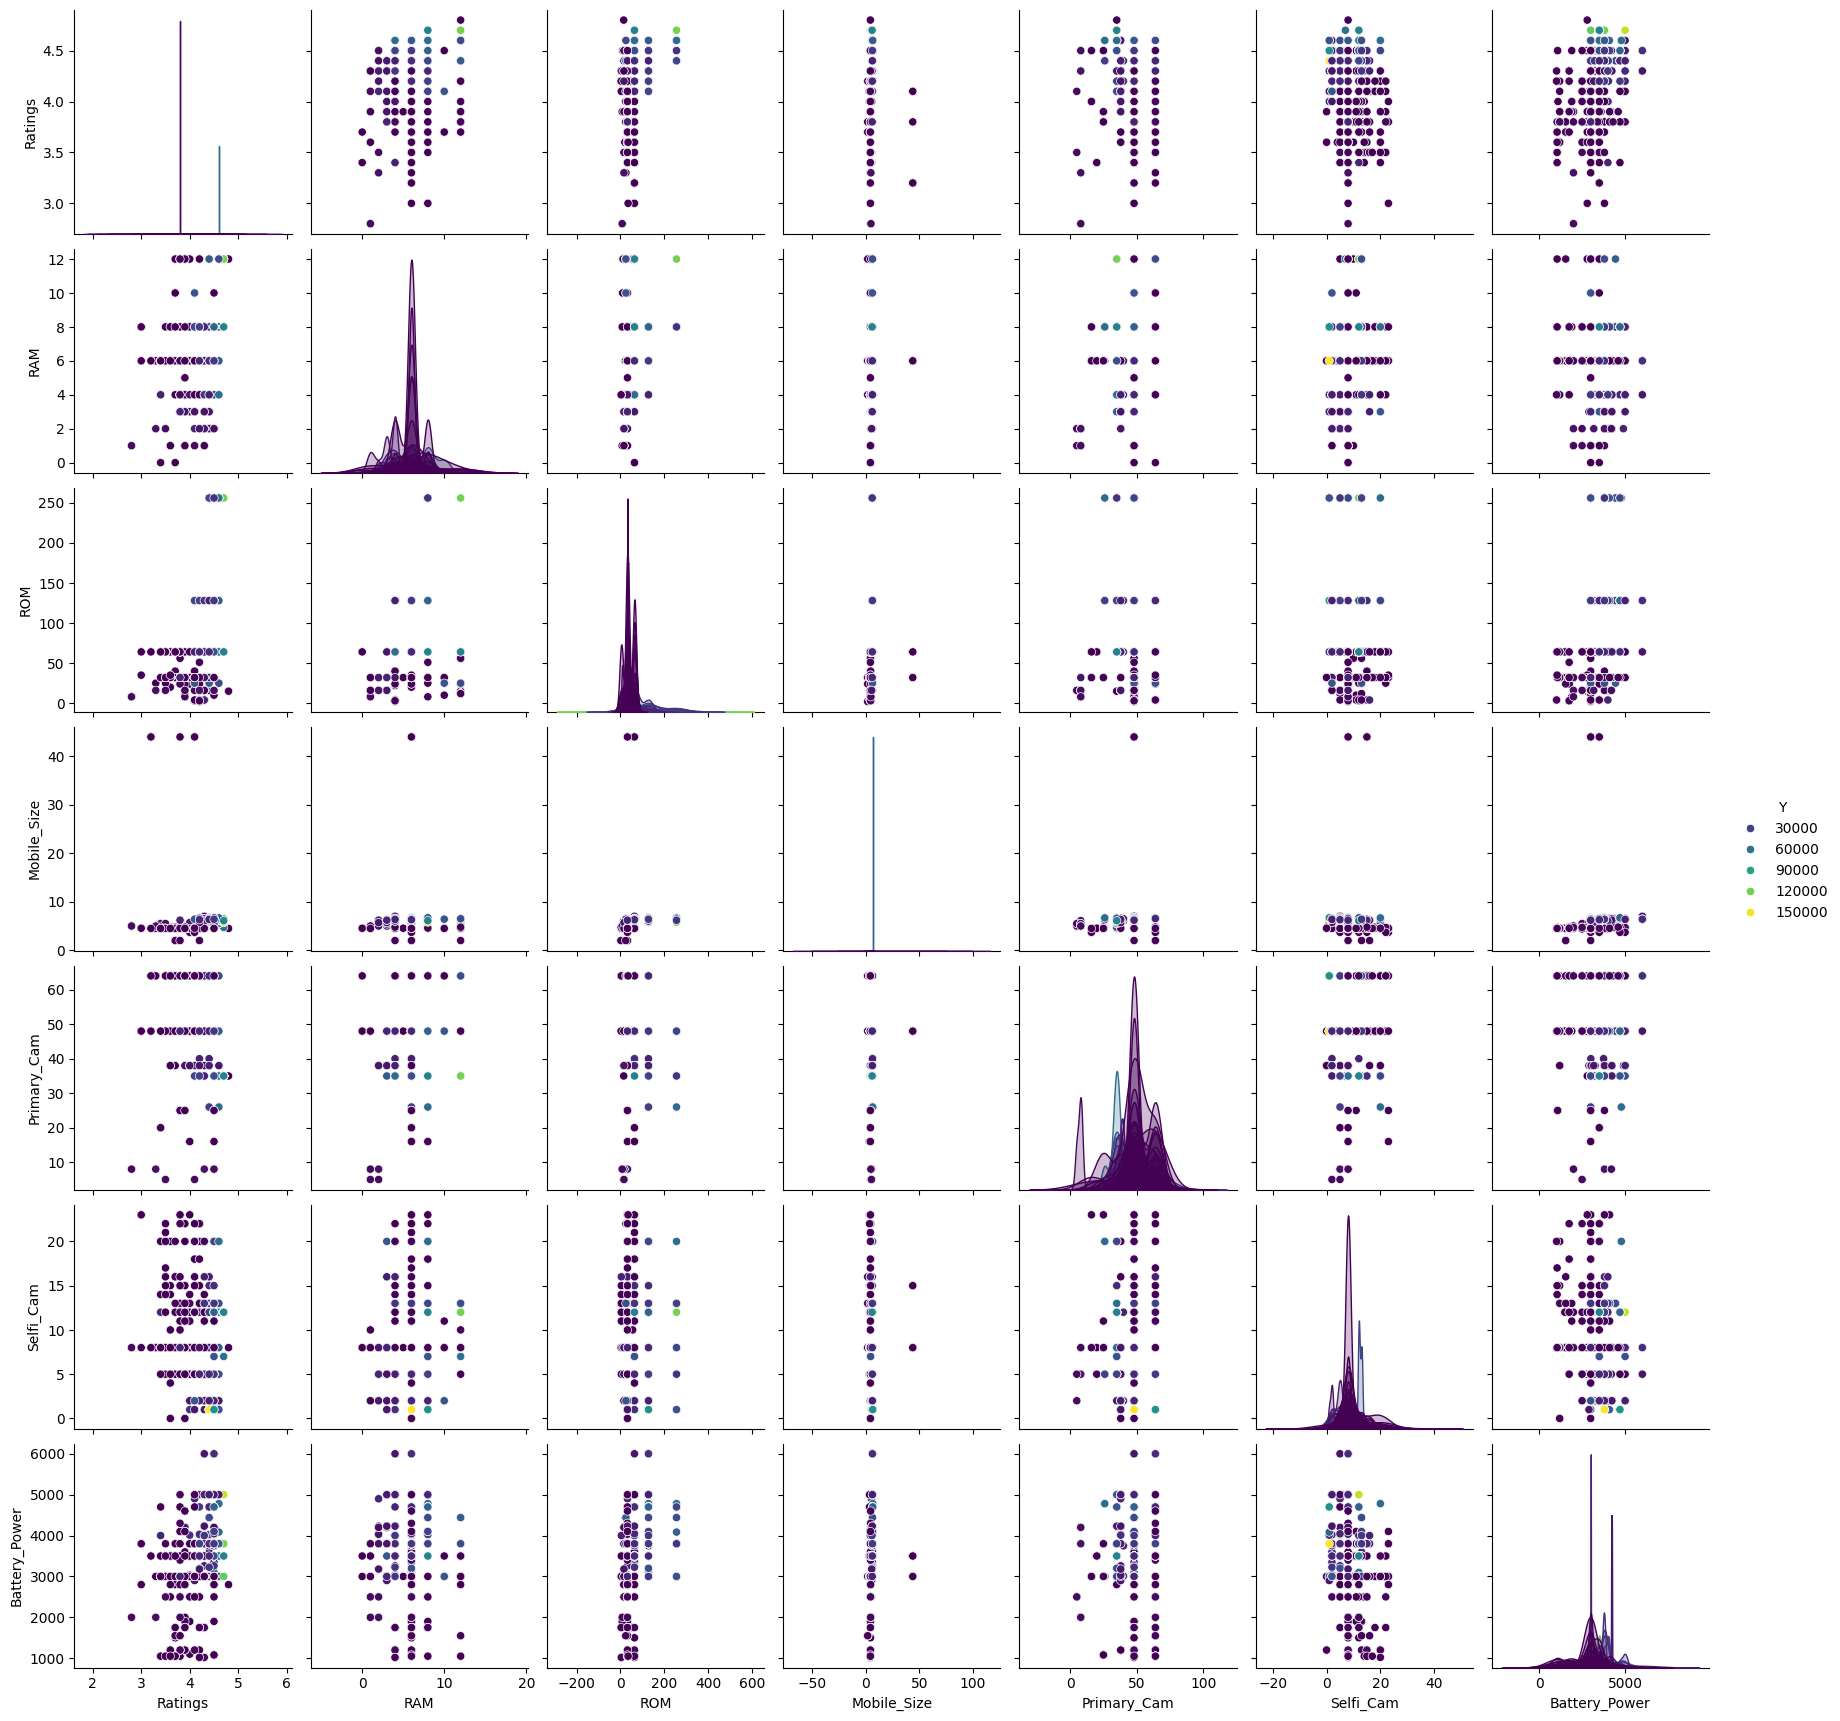

In [8]:
# Plotting dataframe for understanding
import seaborn as sns
sns.pairplot(x_y, hue= 'Y', palette='viridis')
plt.show()

In [9]:
# Checking the correlation of different features to Price
correl = x_y.corr()
correl.style.background_gradient(cmap='coolwarm')

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Y
Ratings,1.000000,0.123675,0.411173,0.065300,-0.125532,-0.105685,0.440641,0.576035
RAM,0.123675,1.000000,0.313531,0.017864,0.137501,0.201593,0.023090,0.307440
ROM,0.411173,0.313531,1.000000,0.120640,-0.077387,-0.023257,0.411522,0.461621
Mobile_Size,0.065300,0.017864,0.120640,1.000000,-0.056925,-0.021255,0.139484,0.092850
Primary_Cam,-0.125532,0.137501,-0.077387,-0.056925,1.000000,0.106373,-0.041771,-0.237344
Selfi_Cam,-0.105685,0.201593,-0.023257,-0.021255,0.106373,1.000000,-0.103852,0.029680
Battery_Power,0.440641,0.023090,0.411522,0.139484,-0.041771,-0.103852,1.000000,0.354645
Y,0.576035,0.307440,0.461621,0.092850,-0.237344,0.029680,0.354645,1.000000


In [10]:
# Selecting the 4 features with highest correlation values relative to Price
selection = ['Ratings', 'RAM', 'ROM', 'Battery_Power']

# Creating new training and testing feature dataframe with only features from selection list
x_train1 = x_train[selection]
x_test1 = x_test[selection]

display(x_train1.head(5))
print(x_train1.shape)

,Ratings,RAM,ROM,Battery_Power
489,4.5,6.0,32.0,1900
196,3.3,6.0,25.0,3000
95,4.3,3.0,32.0,4230
682,4.3,4.0,128.0,3800
125,4.2,4.0,22.0,3000


(645, 4)


In [11]:
# Scaling the data with Standard Scaler
scaler = StandardScaler()
x_train_new = pd.DataFrame(scaler.fit_transform(x_train1), columns = selection)
x_test_new = pd.DataFrame(scaler.transform(x_test1), columns = selection)

scaler_y = StandardScaler()
y_train_new = pd.DataFrame(scaler_y.fit_transform(y_train))
y_test_new = pd.DataFrame(scaler_y.transform(y_test))

In [12]:
display(x_train_new.head(3))
display(x_test_new.head(3))
display(y_train_new.head(3))
display(y_test_new.head(3))

,Ratings,RAM,ROM,Battery_Power
0,1.046809,0.035530,-0.602062,-1.446048
1,-2.203211,0.035530,-0.737308,-0.278314
2,0.505139,-1.459058,-0.602062,1.027425


,Ratings,RAM,ROM,Battery_Power
0,-1.661541,0.035530,0.016206,-0.278314
1,-0.036531,0.035530,-0.602062,-0.278314
2,0.775974,-0.960862,0.016206,1.844839


,0
0,-0.545702
1,-0.582162
2,-0.207965


,0
0,-0.561522
1,-0.484722
2,-0.062551


# Linear Regression

Here, we will use linear regression to train a ML model to predict the mobile phone price when given the features.

In [13]:
# Create linear regression object
reg = linear_model.LinearRegression() #making an instance

# Train the model using the training sets
reg.fit(x_train_new, y_train_new)

# Make predictions using the testing set
y_pred = reg.predict(x_test_new)

In [14]:
# Shows the coeffiecients of each feature and the intercept value
print('Coefficients: \n', reg.coef_)
print('Intercept or Bias: \n', reg.intercept_)

Coefficients: 
 [[0.44024646 0.19227449 0.18784566 0.0789119 ]]
Intercept or Bias: 
 [1.60218698e-17]


In [15]:
# Evaluation metrics to estimate performance for Linear Regressor

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_new, y_pred))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test_new, y_pred))

Mean squared error: 0.51
R2 score: 0.40


Linear Regressor model have a low R2 score of 0.35
This shows that the model does not have a good fit of the data, which could lead to accuracy issues.

Let's implement Neural Network instead to predict the phone price.

# Neural Network

Here, we will use deep learning (Neural Network) to train the ML model.

In [16]:
# Import modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.utils import to_categorical

In [17]:
# Create a fully connected Neural Network
nn = Sequential()

# Hidden layer, 4 features =  4x1 input
#creating 120 neurons in the first hidden layer W - 120x4, b - 4x1, performs Y = Wx + b
nn.add(Dense(120, input_shape=(4,), activation='relu'))

# Output Layer, 1 output 
nn.add(Dense(1))

nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['MeanSquaredError'])

#For linear regression, loss need to change (google it), optimizer 'adam', metrics 'mean square error'
print(nn.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
# Import ModelCheckpoint for saving models after certain epochs
from keras.callbacks import ModelCheckpoint
import os

# Create a folder for saving the checkpoints if it doesn't exist
checkpoint_dir = './checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Define the checkpoint callback to save in the specified folder
checkpoint = ModelCheckpoint(
    os.path.join(checkpoint_dir, 'save_model_epoch_{epoch:02d}.keras'),  # Save path inside the 'checkpoints' folder
    save_best_only=True,  # Optional: Save only the best model based on validation loss (you can change this as needed)
    monitor='val_loss',   # Monitor the validation loss (you can use 'val_accuracy' if you'd prefer)
    mode='min',           # 'min' since we want to minimize loss
    verbose=1             # Display progress when saving
)

# Train the Neural Network with 20 epochs
history = nn.fit(
    x_train_new, y_train_new, 
    validation_split=0.2, 
    epochs=20, 
    batch_size=5, 
    callbacks=[checkpoint]
)


Epoch 1/20
 66/104 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - MeanSquaredError: 0.9342 - loss: 0.9342  
Epoch 1: val_loss improved from inf to 0.65225, saving model to ./checkpoints\save_model_epoch_01.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - MeanSquaredError: 0.8000 - loss: 0.8000 - val_MeanSquaredError: 0.6523 - val_loss: 0.6523
Epoch 2/20
 78/104 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - MeanSquaredError: 0.6441 - loss: 0.6441
Epoch 2: val_loss improved from 0.65225 to 0.58263, saving model to ./checkpoints\save_model_epoch_02.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MeanSquaredError: 0.5778 - loss: 0.5778 - val_MeanSquaredError: 0.5826 - val_loss: 0.5826
Epoch 3/20
 79/104 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - MeanSquaredError: 0.3347 - loss: 0.3347
Epoch 3: val_loss improved from 0.58263 to 0.54210, saving model to ./checkpoints\save_model_epoch_03.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - MeanSquaredError: 0.3397 - loss: 0.3397 - val_MeanSquaredError: 0.5421 - val_loss

In [19]:
# Final evaluation of the model
scores = nn.evaluate(x_test_new, y_test_new, verbose=0) #model weights at the end of 20 epochs
print("Mean Squared Error: %.2f" % (scores[1]))
print("Loss: %.4f" % (scores[0]))

Mean Squared Error: 0.32
Loss: 0.3223


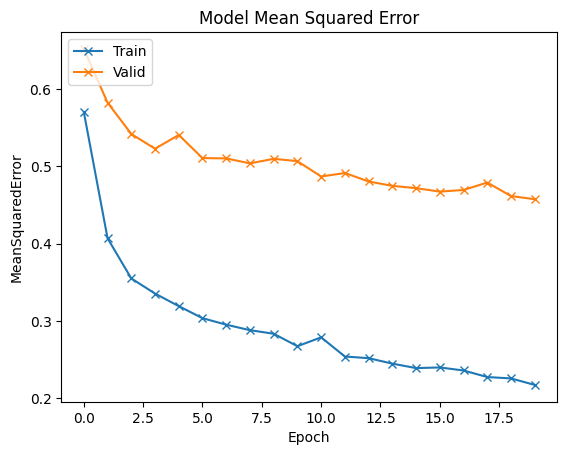

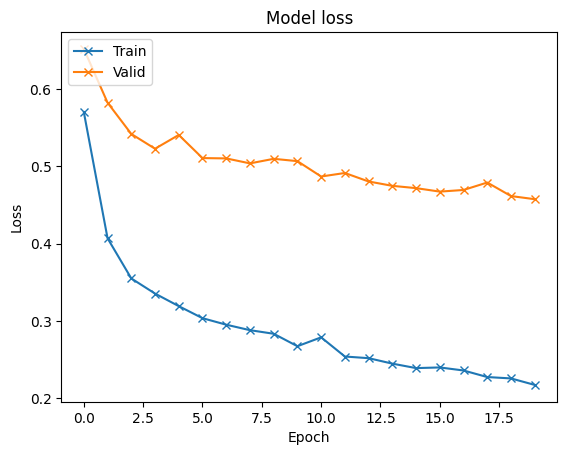

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['MeanSquaredError'],'x-')
plt.plot(history.history['val_MeanSquaredError'],'x-')
plt.title('Model Mean Squared Error')
plt.ylabel('MeanSquaredError')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'],'x-')
plt.plot(history.history['val_loss'],'x-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [21]:
# Finding predicted target values using Neural Network
y_pred_nn = nn.predict(x_test_new)

# Print evaluation Metrics for Linear Regressor
print('Linear Regressor Metrics:')
print("\tMean squared error: %.2f"
      % mean_squared_error(y_test_new, y_pred))
print('\tR2 score: %.2f' % r2_score(y_test_new, y_pred))

print(' ')

# Print evaluation Metrics for Neural Network
print('Neural Network Metrics:')
print("\tMean squared error: %.2f"
      % mean_squared_error(y_test_new, y_pred_nn))
print('\tR2 score: %.2f' % r2_score(y_test_new, y_pred_nn))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Linear Regressor Metrics:
	Mean squared error: 0.51
	R2 score: 0.40
 
Neural Network Metrics:
	Mean squared error: 0.32
	R2 score: 0.62


# Using the model to predict

In [22]:
selection

['Ratings', 'RAM', 'ROM', 'Battery_Power']

In [23]:
# Creating a function to use the model
def price_prediction_nn(Ratings, RAM, ROM, Battery_Power):
    
    checkpoint_dir = './checkpoints'
    # Get a list of all the checkpoint files in the directory
    checkpoint_files = [f for f in os.listdir(checkpoint_dir) if f.endswith('.keras')]
    latest_checkpoint = sorted(checkpoint_files)[-1]  # Get the latest checkpoint file
        
    # Define the full path to the latest checkpoint
    latest_checkpoint_path = os.path.join(checkpoint_dir, latest_checkpoint)
        
    # Load the latest checkpoint model
    model = tf.keras.models.load_model(latest_checkpoint_path)
    
    # Step 1: Prepare input data and scale it
    input_data = np.array([[Ratings, RAM, ROM, Battery_Power]])
    input_scaled = scaler.transform(input_data)  # Scale the input features

    # Step 2: Predict the scaled price using the model
    predicted_price_scaled = model.predict(input_scaled)

    # Step 3: Inverse scale the predicted price to get the original price
    predicted_price_original = scaler_y.inverse_transform(predicted_price_scaled)

    return predicted_price_original[0][0]

In [24]:
price_prediction_nn(Ratings=4.5, RAM=8, ROM=128, Battery_Power=4000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


np.float32(45774.61)